<a href="https://colab.research.google.com/github/Dkiggs/SQL_Assigment/blob/main/Life_Expectancy_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Import the necessary libraries



In [172]:
!pip install modelbit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score



from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model


from warnings import filterwarnings
filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 46.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 70.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 53.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 11.3 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of types-requests to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of types-requests to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runt

In [129]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [130]:
data = pd.read_csv("/content/drive/MyDrive/Datasets/Life_expectancy.csv")
print(f'Number of rows and columns: {data.shape}')
data.head()

Number of rows and columns: (2938, 22)


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


**Exploratory Data Analysis**

In [131]:
# data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [132]:
# checking features
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

**Statistical description of data**

In [133]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2938.0,2.007519e+03,4.613841e+00,2000.00000,2004.000000,2.008000e+03,2.012000e+03,2.015000e+03
Life expectancy,2928.0,6.922493e+01,9.523867e+00,36.30000,63.100000,7.210000e+01,7.570000e+01,8.900000e+01
Adult Mortality,2928.0,1.647964e+02,1.242921e+02,1.00000,74.000000,1.440000e+02,2.280000e+02,7.230000e+02
infant deaths,2938.0,3.030395e+01,1.179265e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03
Alcohol,2744.0,4.602861e+00,4.052413e+00,0.01000,0.877500,3.755000e+00,7.702500e+00,1.787000e+01
percentage expenditure,2938.0,7.382513e+02,1.987915e+03,0.00000,4.685343,6.491291e+01,4.415341e+02,1.947991e+04
Hepatitis B,2385.0,8.094046e+01,2.507002e+01,1.00000,77.000000,9.200000e+01,9.700000e+01,9.900000e+01
Measles,2938.0,2.419592e+03,1.146727e+04,0.00000,0.000000,1.700000e+01,3.602500e+02,2.121830e+05
BMI,2904.0,3.832125e+01,2.004403e+01,1.00000,19.300000,4.350000e+01,5.620000e+01,8.730000e+01
under-five deaths,2938.0,4.203574e+01,1.604455e+02,0.00000,0.000000,4.000000e+00,2.800000e+01,2.500000e+03


In [134]:
# Counts of Numerical features
cols = data.select_dtypes(include=['float64', 'int64']).columns

for i in cols:
    print(i, data[i].value_counts())
    print('-----------------------------------')

Year Year
2013    193
2015    183
2014    183
2012    183
2011    183
2010    183
2009    183
2008    183
2007    183
2006    183
2005    183
2004    183
2003    183
2002    183
2001    183
2000    183
Name: count, dtype: int64
-----------------------------------
Life expectancy  Life expectancy 
73.0    45
75.0    33
78.0    31
73.6    28
73.9    25
        ..
43.1     1
49.5     1
49.0     1
55.1     1
45.4     1
Name: count, Length: 362, dtype: int64
-----------------------------------
Adult Mortality Adult Mortality
12.0     34
14.0     30
16.0     29
11.0     25
138.0    25
         ..
666.0     1
675.0     1
654.0     1
633.0     1
665.0     1
Name: count, Length: 425, dtype: int64
-----------------------------------
infant deaths infant deaths
0      848
1      342
2      203
3      175
4       96
      ... 
171      1
201      1
215      1
253      1
110      1
Name: count, Length: 209, dtype: int64
-----------------------------------
Alcohol Alcohol
0.01    288
0.03     15
0.0

In [135]:
# Counts of categorical features, country and status
data['Country'].value_counts()


Country
Afghanistan              16
Peru                     16
Nicaragua                16
Niger                    16
Nigeria                  16
                         ..
Niue                      1
San Marino                1
Nauru                     1
Saint Kitts and Nevis     1
Dominica                  1
Name: count, Length: 193, dtype: int64

In [136]:
# status
data['Status'].value_counts()

Status
Developing    2426
Developed      512
Name: count, dtype: int64

In [137]:
# checking and fixing Nan values
data.isnull().sum()


Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [138]:
# Since the Nan values are large, i will use simple imputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean', fill_value=None)

data['Life expectancy ']=imputer.fit_transform(data[['Life expectancy ']])
data['Adult Mortality']=imputer.fit_transform(data[['Adult Mortality']])
data['Alcohol']=imputer.fit_transform(data[['Alcohol']])
data['Hepatitis B']=imputer.fit_transform(data[['Hepatitis B']])
data[' BMI ']=imputer.fit_transform(data[[' BMI ']])
data['Polio']=imputer.fit_transform(data[['Polio']])
data['Total expenditure']=imputer.fit_transform(data[['Total expenditure']])
data['Diphtheria ']=imputer.fit_transform(data[['Diphtheria ']])
data['GDP']=imputer.fit_transform(data[['GDP']])
data['Population']=imputer.fit_transform(data[['Population']])
data[' thinness  1-19 years']=imputer.fit_transform(data[[' thinness  1-19 years']])
data[' thinness 5-9 years']=imputer.fit_transform(data[[' thinness 5-9 years']])
data['Income composition of resources']=imputer.fit_transform(data[['Income composition of resources']])
data['Schooling']=imputer.fit_transform(data[['Schooling']])

In [139]:
data.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

# **Data Visualization** for EDA

In [140]:
#using plotly draw count plot for df['Year']
fig = px.histogram(data, x='Year', color='Year', title='Count Plot for Year')

#update layout to center the title and make it bold
fig.update_layout(
    title=dict(text='<b>Count Plot for Year</b>', x=0.5)
)

fig.show()

In [141]:
#using plotly draw line plot to show the trend of life expectancy over the years
fig = px.line(data.sort_values(by='Year'), x='Year', y='Life expectancy ',animation_frame='Country',animation_group='Year',color='Country', title='Trend of Life Expectancy Over the Years')

#update layout to center the title and make it bold
fig.update_layout(
    title=dict(text='<b>Trend of Life Expectancy Over the Years</b>', x=0.5)
)

fig.show()

In [142]:
#draw count plot for data['Status'] and color each bar with different color
fig = px.histogram(data, x='Status', color='Status', title='Count Plot for Status of Country')

#update layout to center the title and make it bold
fig.update_layout(
    title=dict(text='<b>Count Plot for Status of Country</b>', x=0.5)
)

fig.show()

Checking the range of life expectancy in both developed and developing countries

Developed

In [143]:
 #Filter DataFrame for 'Developed' status
developed_df = data[data['Status'] == 'Developed']

# Create a histogram
fig = px.histogram(developed_df, x='Life expectancy ', title="Life Expectancy of Developing Nations")
fig.update_layout(
    xaxis_title='',
    yaxis_title='Count of Ages',
    title_text='<b>Life Expectancy of Developed Countries</b>',
    title_x=0.5,  # Center title
)
fig.show()

The life expectancy range for developed countries is between 70 and 90

Developing

In [144]:
 #Filter DataFrame for 'Developing' status
developing_df = data[data['Status'] == 'Developing']

# Create a histogram
fig = px.histogram(developing_df, x='Life expectancy ', title="Life Expectancy of Developing Nations")
fig.update_layout(
    xaxis_title='',
    yaxis_title='Count of Ages',
    title_text='<b>Life Expectancy of Developing Countries</b>',
    title_x=0.5,  # Center title
)
fig.show()

The life expectancy for developing countries ranges from 40 to 90

In [145]:
#Average Adult Mortality of Developing and Developed Countries
fig = px.bar(data.groupby('Status', as_index=False).agg({'Adult Mortality':'mean'}),
             x='Status',
             y='Adult Mortality',
             color='Status',
             title='Average Adult Mortality of Developing and Developed Countries')

# Update layout to center the title
fig.update_layout(title_text='<b>Average Adult Mortality of Developing and Developed Countries</b>', title_x=0.5)

# Show the plot
fig.show()

In [146]:
#Average Infant deaths of Developing and Developed Countries
fig = px.bar(data.groupby('Status', as_index=False).agg({'infant deaths':'mean'}),
             x='Status',
             y='infant deaths',
             color='Status',
             title='Average Infant deaths of Developing and Developed Countries')

# Update layout to center the title
fig.update_layout(title_text='<b>Average Infant deaths of Developing and Developed Countries</b>', title_x=0.5)

# Show the plot
fig.show()

Developing countries have highest infant deaths and mortality rates

**Data Preprocessing**

Handling categorical variables
1. Countiry
2. Status

In [147]:

# Before encoding
data['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

In [148]:
# "Status" bedore encoding
data['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [149]:
# function to encode categorical variables
cols_to_encode = ['Country', 'Status']
label_encoder_data = LabelEncoder()
for col in cols_to_encode:
    data[col] = label_encoder_data.fit_transform(data[col])

After encoding

In [150]:
data['Country'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  44,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [151]:
data['Status'].unique()

array([1, 0])

**Splitting features from  target variable**


In [152]:
X = data.drop('Life expectancy ', axis=1)
y = data['Life expectancy ']
X

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,1,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,1,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,1,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,1,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,1,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,192,2004,1,723.0,27,4.36,0.000000,68.0,31,27.1,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,192,2003,1,715.0,26,4.06,0.000000,7.0,998,26.7,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,192,2002,1,73.0,25,4.43,0.000000,73.0,304,26.3,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,192,2001,1,686.0,25,1.72,0.000000,76.0,529,25.9,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


**Data Scaling**

In [153]:
# Columns to scale
cols_to_scale = ['Country', 'Year', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']

# Apply Min-Max scaling to the specified columns
scaler = MinMaxScaler()
X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])

In [154]:
X

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0.0,1.000000,1,0.362881,0.034444,0.000000,0.003659,0.653061,0.005439,0.209733,...,0.031250,0.452118,0.649485,0.000000,0.004889,0.026074,0.619565,0.603509,0.505274,0.487923
1,0.0,0.933333,1,0.373961,0.035556,0.000000,0.003774,0.622449,0.002319,0.203940,...,0.572917,0.453279,0.618557,0.000000,0.005127,0.000253,0.630435,0.610526,0.502110,0.483092
2,0.0,0.866667,1,0.369806,0.036667,0.000000,0.003759,0.642857,0.002027,0.198146,...,0.614583,0.450377,0.639175,0.000000,0.005287,0.024525,0.637681,0.617544,0.495781,0.478261
3,0.0,0.800000,1,0.375346,0.038333,0.000000,0.004014,0.673469,0.013135,0.192352,...,0.666667,0.473012,0.670103,0.000000,0.005608,0.002857,0.644928,0.628070,0.488397,0.473430
4,0.0,0.733333,1,0.379501,0.039444,0.000000,0.000364,0.683673,0.014200,0.187717,...,0.677083,0.435287,0.680412,0.000000,0.000519,0.002302,0.655797,0.635088,0.478903,0.458937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,1.0,0.266667,1,1.000000,0.015000,0.243561,0.000000,0.683673,0.000146,0.302433,...,0.666667,0.392339,0.649485,0.663366,0.003799,0.009875,0.336957,0.326316,0.429325,0.444444
2934,1.0,0.200000,1,0.988920,0.014444,0.226764,0.000000,0.061224,0.004703,0.297798,...,0.041667,0.356936,0.680412,0.724752,0.003790,0.009764,0.351449,0.343860,0.440928,0.458937
2935,1.0,0.133333,1,0.099723,0.013889,0.247480,0.000000,0.734694,0.001433,0.293163,...,0.729167,0.357516,0.711340,0.786139,0.000467,0.000097,0.039855,0.042105,0.450422,0.483092
2936,1.0,0.066667,1,0.948753,0.013889,0.095745,0.000000,0.765306,0.002493,0.288528,...,0.760417,0.336042,0.752577,0.831683,0.004589,0.009558,0.054348,0.056140,0.450422,0.473430


**Splitting into Train and Test set**

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [156]:
print(f"Shape of X_train is: {X_train.shape}")
print(f"Shape of Y_train is: {y_train.shape}\n")
print(f"Shape of X_test is: {X_test.shape}")
print(f"Shape of Y_test is: {y_test.shape}")

Shape of X_train is: (2350, 21)
Shape of Y_train is: (2350,)

Shape of X_test is: (588, 21)
Shape of Y_test is: (588,)


**RNN MODEL**

In [157]:
# Define the RNN model
from keras.models import Sequential
from keras.layers import LSTM
from keras.callbacks import EarlyStopping


model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1, activation='sigmoid'))

In [158]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min', restore_best_weights=True)

In [159]:
# Train the model
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=100, batch_size=32, callbacks=[early_stopping])

Epoch 1/100
74/74 [==============================] - 12s 80ms/step - loss: -474.3290 - accuracy: 0.0000e+00 - val_loss: -770.9105 - val_accuracy: 0.0000e+00
Epoch 2/100
74/74 [==============================] - 3s 36ms/step - loss: -917.1141 - accuracy: 0.0000e+00 - val_loss: -1056.2089 - val_accuracy: 0.0000e+00
Epoch 3/100
74/74 [==============================] - 2s 34ms/step - loss: -1191.9213 - accuracy: 0.0000e+00 - val_loss: -1324.6344 - val_accuracy: 0.0000e+00
Epoch 4/100
74/74 [==============================] - 3s 36ms/step - loss: -1464.6272 - accuracy: 0.0000e+00 - val_loss: -1596.8448 - val_accuracy: 0.0000e+00
Epoch 5/100
74/74 [==============================] - 4s 56ms/step - loss: -1733.0007 - accuracy: 0.0000e+00 - val_loss: -1861.1697 - val_accuracy: 0.0000e+00
Epoch 6/100
74/74 [==============================] - 3s 40ms/step - loss: -1996.4093 - accuracy: 0.0000e+00 - val_loss: -2121.6274 - val_accuracy: 0.0000e+00
Epoch 7/100
74/74 [==============================] - 3

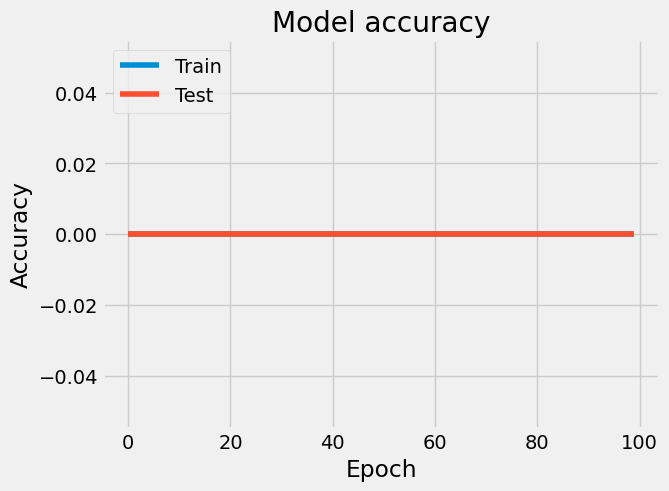

In [160]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

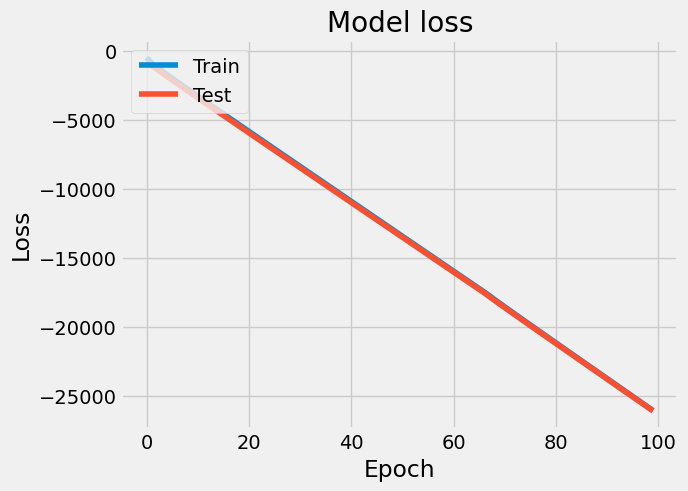

In [161]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [162]:
# Reshape X_test using NumPy
X_test_reshaped = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

19/19 [==============================] - 2s 14ms/step - loss: -26078.3809 - accuracy: 0.0000e+00
Test Loss: -26078.380859375, Test Accuracy: 0.0


**ANN MODEL**

In [163]:
model = Sequential([
        Dense(64, activation='relu', input_dim=21),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(1, activation='linear')
])
# compiling model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error','mean_squared_error'])

In [164]:
# Model summary
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                1408      
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 dense_14 (Dense)            (None, 64)                4160      
                                                                 
 dense_15 (Dense)            (None, 1)                 65        
                                                                 
Total params: 9793 (38.25 KB)
Trainable params: 9793 (38.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [165]:
history = model.fit(X_train, y_train, epochs=150, validation_split=0.2)

Epoch 1/150
59/59 [==============================] - 1s 6ms/step - loss: 4002.6111 - mean_absolute_error: 61.9193 - mean_squared_error: 4002.6111 - val_loss: 1303.0715 - val_mean_absolute_error: 34.9987 - val_mean_squared_error: 1303.0715
Epoch 2/150
59/59 [==============================] - 0s 3ms/step - loss: 214.0824 - mean_absolute_error: 11.0494 - mean_squared_error: 214.0824 - val_loss: 79.5711 - val_mean_absolute_error: 6.9035 - val_mean_squared_error: 79.5711
Epoch 3/150
59/59 [==============================] - 0s 3ms/step - loss: 70.9513 - mean_absolute_error: 6.4005 - mean_squared_error: 70.9513 - val_loss: 63.6244 - val_mean_absolute_error: 6.1375 - val_mean_squared_error: 63.6244
Epoch 4/150
59/59 [==============================] - 0s 3ms/step - loss: 57.8586 - mean_absolute_error: 5.8129 - mean_squared_error: 57.8586 - val_loss: 54.6558 - val_mean_absolute_error: 5.7013 - val_mean_squared_error: 54.6558
Epoch 5/150
59/59 [==============================] - 0s 3ms/step - loss

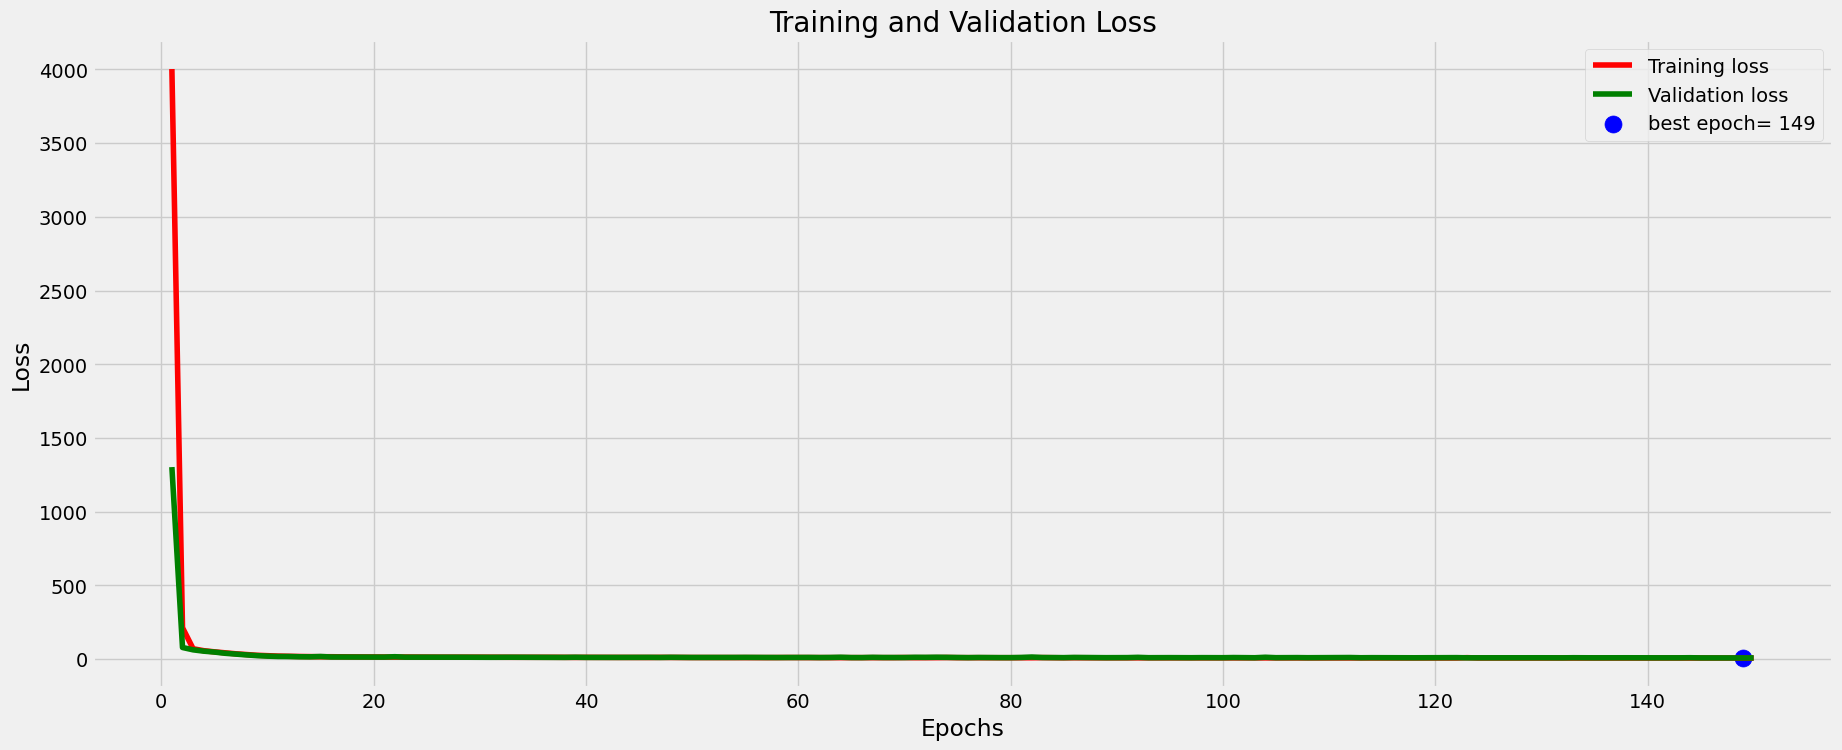

In [166]:
# Define needed variables
tr_loss = history.history['loss']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

Epochs = [i+1 for i in range(len(tr_loss))]
loss_label = f'best epoch= {str(index_loss + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout
plt.show()

In [167]:
#metrics=['mean_absolute_error','mean_squared_error']

mae = history.history['mean_absolute_error']

acc_loss_df = pd.DataFrame({"Mean Absolute error" : mae,
                            "Loss" : tr_loss,
                            "Epoch" : Epochs})

acc_loss_df.style.bar(color = '#84A9AC',
                      subset = ['Mean Absolute error','Loss'])

,Mean Absolute error,Loss,Epoch
0,61.919323,4002.611084,1
1,11.049373,214.082367,2
2,6.400530,70.951317,3
3,5.812915,57.858570,4
4,5.455251,50.063847,5
5,5.054374,43.247898,6
6,4.689769,36.931080,7
7,4.322451,31.569967,8
8,3.966020,26.826899,9
9,3.737347,23.901001,10


**Prediction**

In [168]:
y_pred = model.predict(X_test)

19/19 [==============================] - 0s 1ms/step


In [169]:
R2 = r2_score(y_test, y_pred)
print("R2 Score=",R2 )

R2 Score= 0.9101587824541723


In [170]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

Combination of 9 algorithms;Random Forest,Gradient Boosting,Support Vector Machine,Logistic Regression,K-Nearest Neighbors,Decision Tree,Ada Boost,XG Boost and Naive Bayes,training them and comparing them for the best out of it.

In [171]:

model_scores = []

# Create a list of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__max_depth': [None, 10, 20]}),  #  hyperparameters for Random Forest

    ('Gradient Boosting', GradientBoostingClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__learning_rate': [0.05, 0.1, 0.5]}),  # hyperparameters for Gradient Boosting

    ('Support Vector Machine', SVC(random_state=42, class_weight='balanced'),
        {'model__C': [0.1, 1, 10],
         'model__gamma': ['scale', 'auto']}),  # hyperparameters for SVM

    ('Logistic Regression', LogisticRegression(random_state=42, class_weight='balanced'),
        {'model__C': [0.1, 1, 10],
         'model__penalty': ['l1', 'l2']}),  #  hyperparameters for Logistic Regression

    ('K-Nearest Neighbors', KNeighborsClassifier(),
        {'model__n_neighbors': [3, 5, 7],
         'model__weights': ['uniform', 'distance']}),  #  hyperparameters for KNN

    ('Decision Tree', DecisionTreeClassifier(random_state=42),
        {'model__max_depth': [None, 10, 20],
         'model__min_samples_split': [2, 5, 10]}),  # hyperparameters for Decision Tree

    ('Ada Boost', AdaBoostClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__learning_rate': [0.05, 0.1, 0.5]}),  #  hyperparameters for Ada Boost

    ('XG Boost', XGBClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__learning_rate': [0.05, 0.1, 0.5]}),  # hyperparameters for XG Boost
    ('Naive Bayes', GaussianNB(), {})  # No hyperparameters for Naive Bayes
]
best_model = None
best_accuracy = 0.0

# Iterate over the models and evaluate their performance
for name, model, param_grid in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),  # Feature Scaling
        ('model', model)
])

# Hyperparameter tuning using GridSearchCV
if param_grid:
    grid_search = GridSearchCV(pipeline, param_grid, cv=2, error_score='raise')
    grid_search.fit(X_train, y_train)
    pipeline = grid_search.best_estimator_

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    # Append model name and accuracy to the list
    model_scores.append({'Model': name, 'Accuracy': accuracy})

    # Convert the list to a DataFrame
    scores_df = pd.DataFrame(model_scores)
    # Print the performance metrics
    print("Model:", name)
    print("Test Accuracy:", round(accuracy, 3), "%")
    print()

    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Retrieve the overall best model
print("Best Model:")
print("Test Accuracy:", best_accuracy)
print("Model Pipeline:", best_model, "with accuracy", "{:.2f}".format(best_accuracy), "%")

Best Model:
Test Accuracy: 0.0
Model Pipeline: None with accuracy 0.00 %
